# EDA: Ultimate Challenge

## Goal:
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

### Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

Lets convert this file to a dataframe first and take a quick look at it.

In [64]:
path = 'logins.json'
logins = pd.read_json(path)
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Looks like this is just a json file of login times, so lets set this the index and convert this to date time value.

In [65]:
logins= logins.set_index('login_time')
logins.index = pd.to_datetime(logins.index)
logins.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


Lets also create a value column and set it equal to one for all these values.

In [66]:
logins['value'] = 1
logins.head()

,value
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


Now we need to group values every 15 minutes, fortunately pandas has a handy function for doing this, as seen here.

In [67]:
intervals = logins.groupby([pd.Grouper(freq='15Min')]).agg(count=('value', 'count')).copy()
intervals.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Lets take a quick look at value through seaborn.

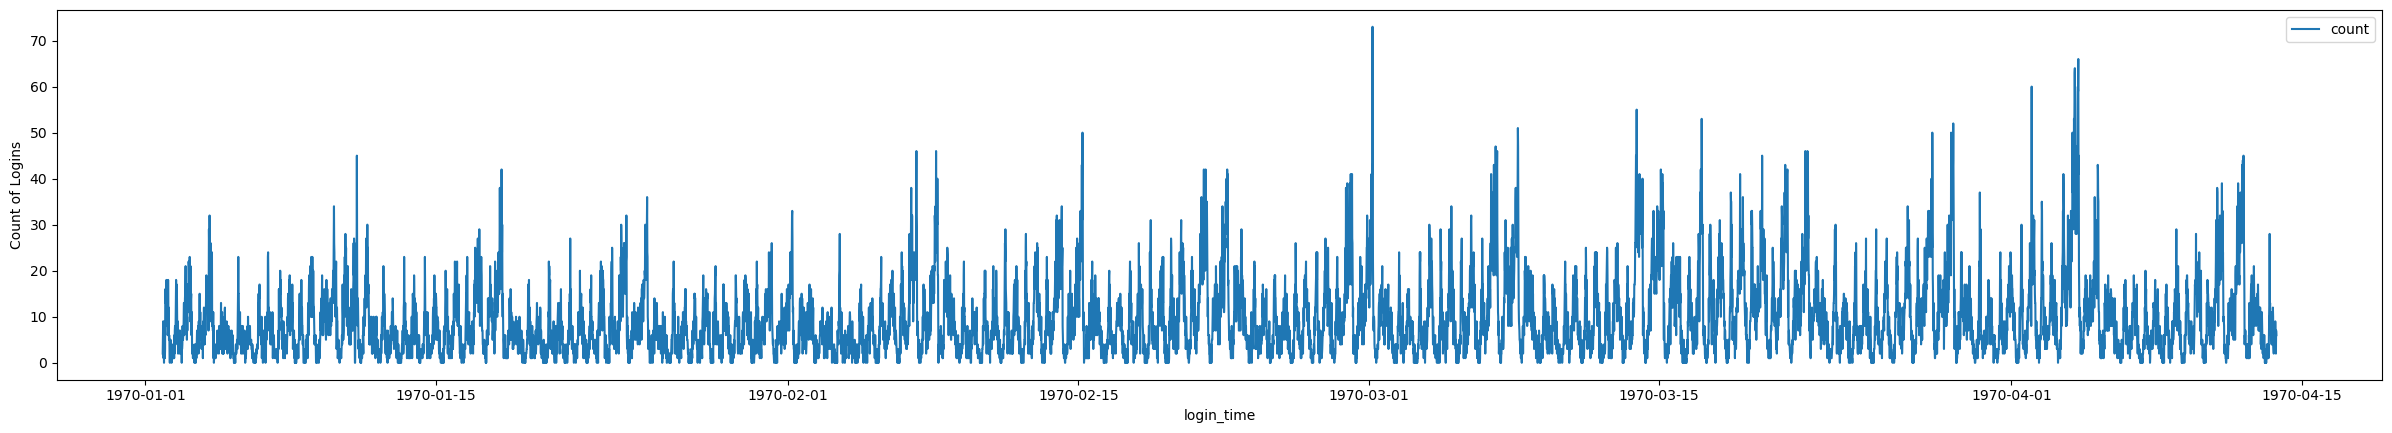

In [68]:
plt.figure().set_figwidth(30)
sns.lineplot(data=intervals)
plt.ylabel('Count of Logins')
plt.show()

There definitely seems to be daily variance and weekly variance, lets see if we can sort this out. I am going to set the period to daily and weekly just to take a look.

<Figure size 3000x480 with 0 Axes>

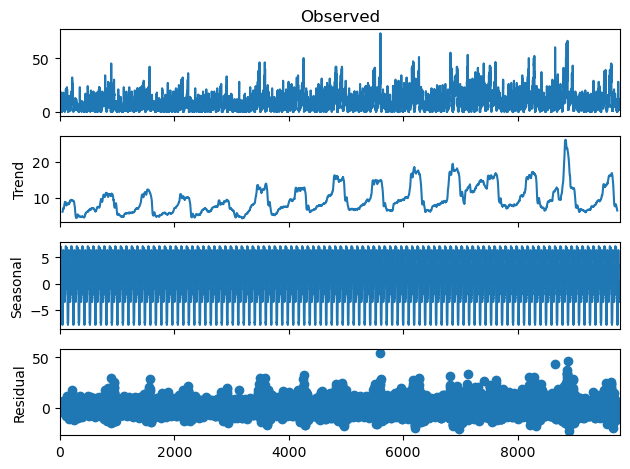

In [74]:
result = seasonal_decompose(intervals.values, model='additive', period=24*4)
result.plot()
plt.show();

In the trend line, we can see some weekly pattern there, so lets break it down further.

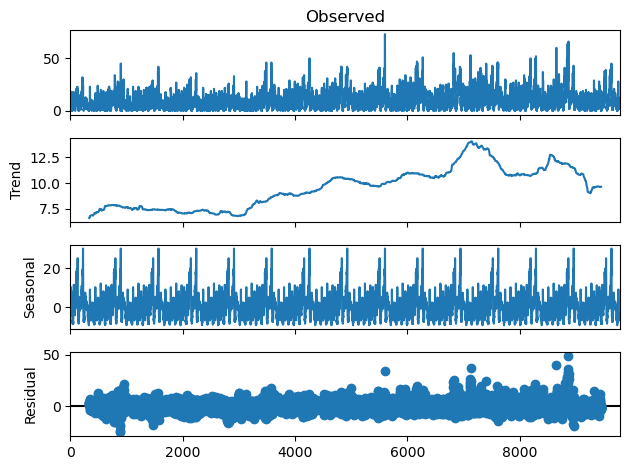

In [76]:
result = seasonal_decompose(intervals.values, model='additive', period=24*4*7)
result.plot()
plt.show();

Lets plot the average values for each day of the week.

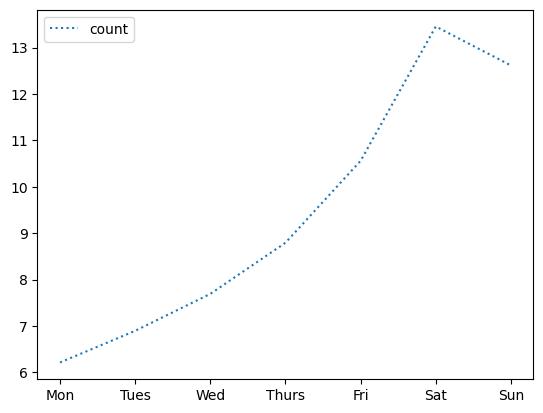

In [70]:
by_weekday = intervals.groupby(intervals.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

Lets do the same daily.

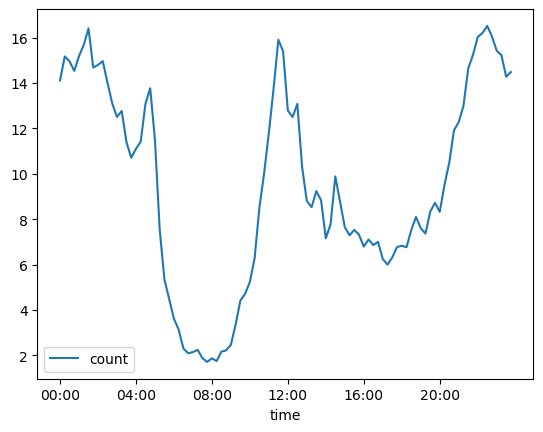

In [71]:
by_time = intervals.groupby(intervals.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks);

## Conclusion

So there are definitely daily and weekly trends. If we had more data, we could look at monthly trends and holiday data. As you can see on the weekend, the count values are high and peak login times through the day are around 11:00 to 12:00 and at around 22:00-2:00. There is a major dip at around 8:00.